In [1]:
import pywt
import scipy.stats
import scipy.signal
import scipy.io

import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

from kpnet.handler import *
from kpnet.network import *
from kpnet.signal import *
from kpnet.callback import *
from kpnet.analysis import *
from kpnet.patterns import *

from wavelets import *

In [21]:
neurons = 64
time_interval = 100000

In [22]:
np.random.seed(0)
neuron = 5
net = KPNetworkTanhDelayed(neurons, 3, alpha=0.06, beta=0.2, gamma=3.2)

callbacks = {}
callbacks['N_' + str(neuron)] = NeuronActivityCallback(time_interval, neuron)

#for i in range(2, 5):
#    callbacks['Trace_' + str(i)] = TraceCallback(time_interval, 189, i)

for i in range(neurons):
    callbacks['W_' + str(i)] = Weight0Callback(time_interval, i, neuron)
    
signal = SwitchSignal([2000, time_interval], [RandomUnitSignal(neurons), ZeroSignal(neurons)])
handler = ComputationHandler(time_interval)
%time results = handler.run(net, signal, callbacks)

CPU times: user 15.9 s, sys: 8 ms, total: 15.9 s
Wall time: 15.9 s


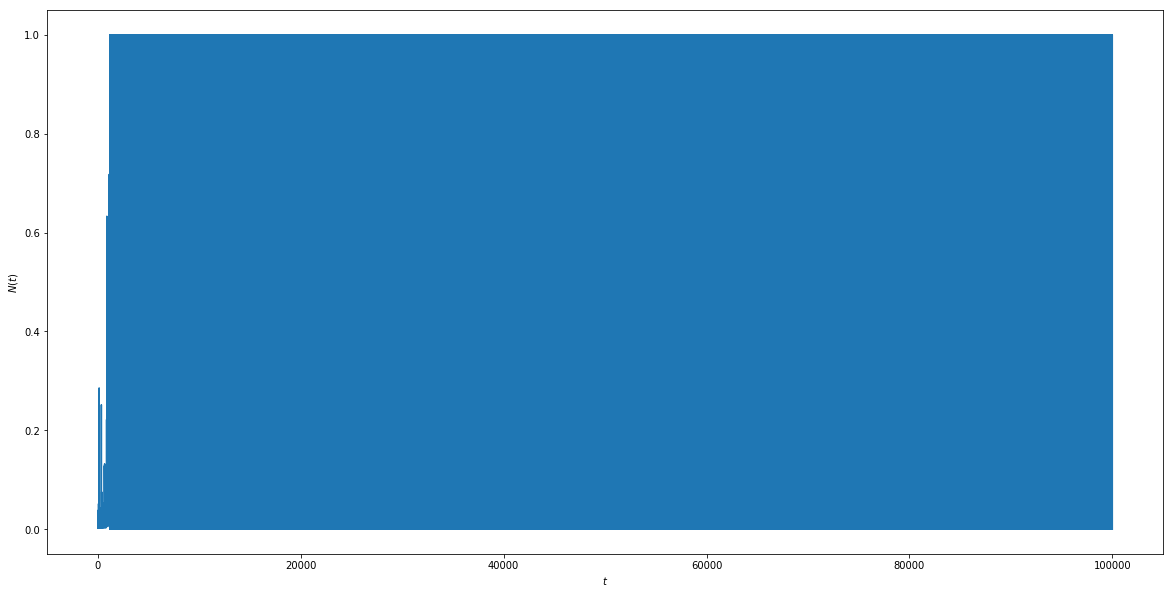

In [23]:
plt.figure(figsize=(20, 10))
plt.plot(results['N_5'])
plt.ylabel(r'$N(t)$')
plt.xlabel(r'$t$')
plt.show()

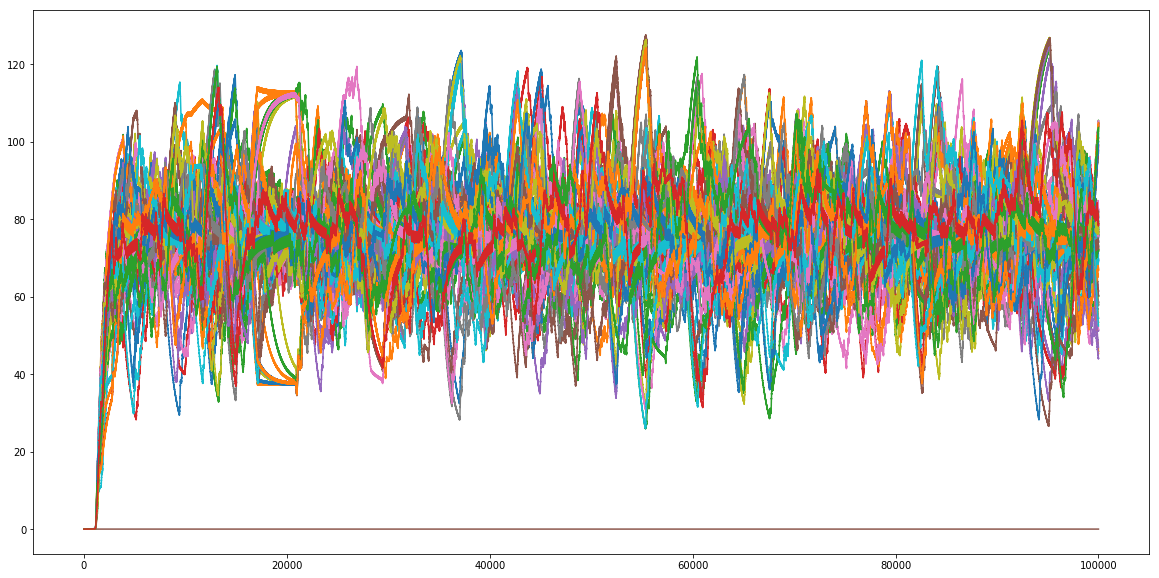

In [24]:
plt.figure(figsize=(20, 10))
for i in range(neurons):
    plt.plot(results['W_' + str(i)])
plt.show()

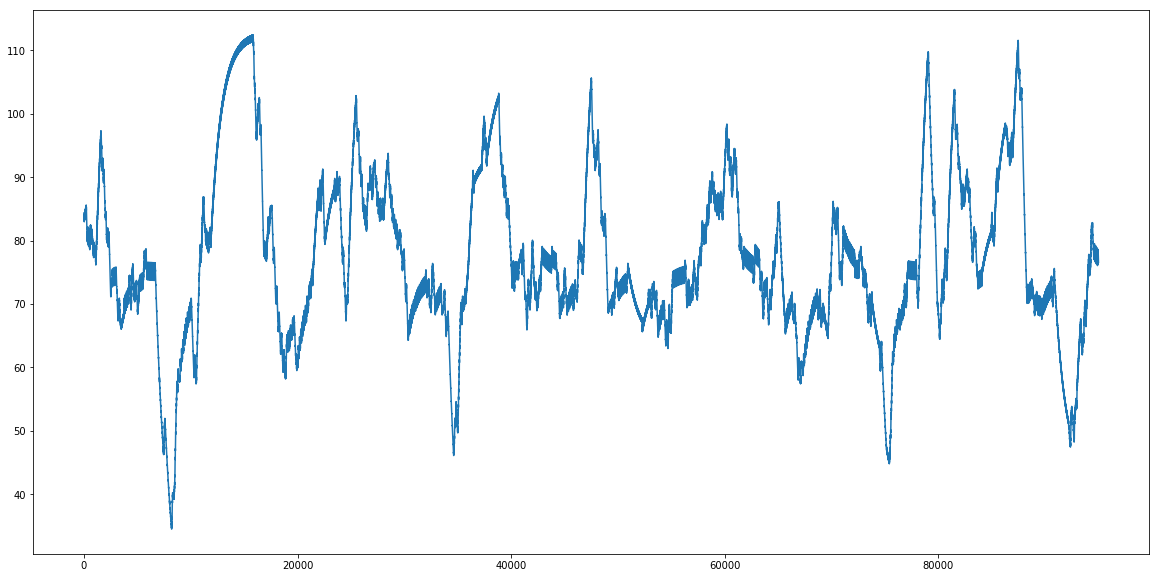

In [39]:
plt.figure(figsize=(20, 10))
plt.plot(results['W_8'][5000:])
plt.show()

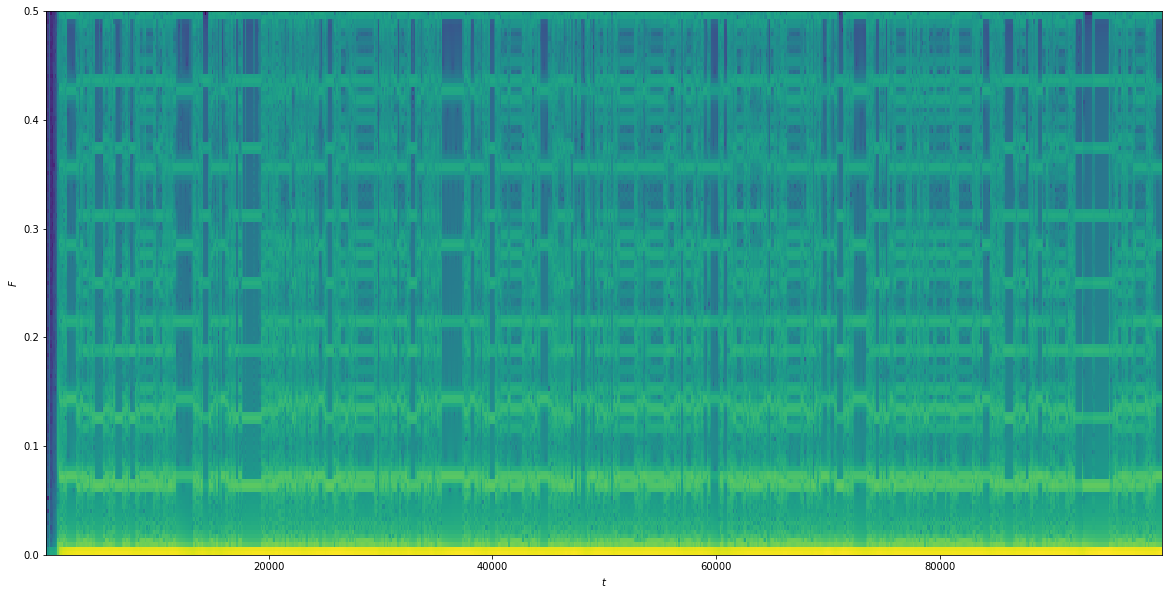

In [26]:
plt.figure(figsize=(20, 10))
plt.specgram(results['W_2'], 256, 1, 0)
plt.xlabel(r'$t$')
plt.ylabel(r'$F$')
plt.show()

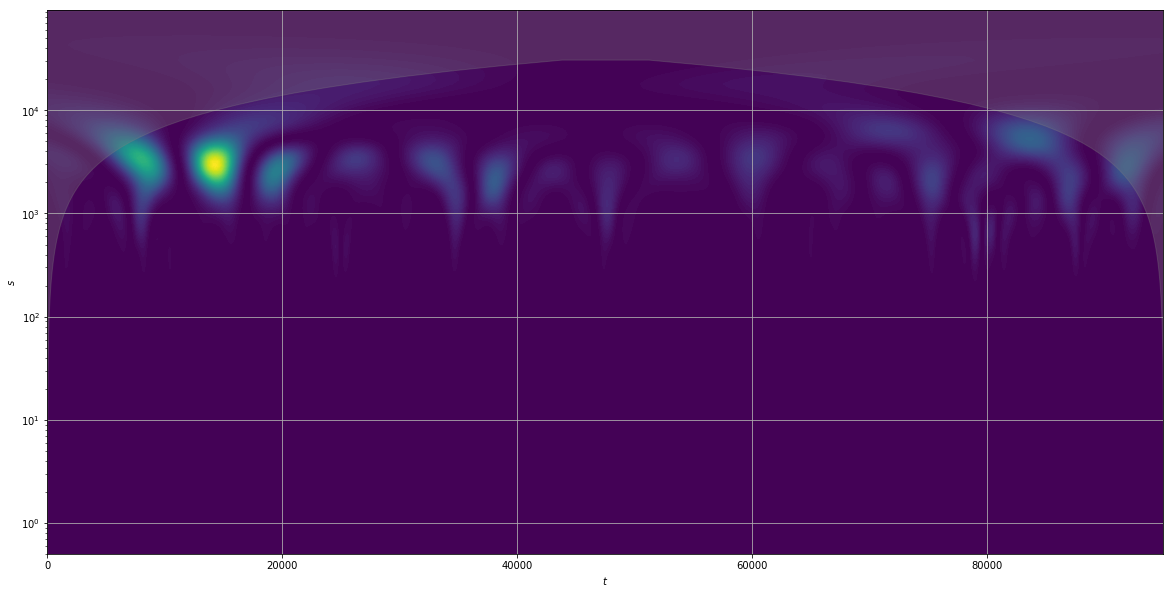

In [37]:
wa = WaveletAnalysis(results['W_8'][5000:], wavelet=Ricker())
fig = plt.figure(figsize=(20, 10)) 
ax = plt.subplot()
wa.plot_power(ax)
plt.xlabel(r'$t$')
plt.ylabel(r'$s$')
plt.show()